In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import re
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [2]:
alo_name='EGO_Planner'

In [ ]:
# Reading Excel files
df = pd.read_excel(alo_name+'_success_rate.xlsx', sheet_name='Sheet1')

In [ ]:
# Define function conversion success rate
def convert_success_rate(cell):
    if isinstance(cell, str):
        # Number of successful and failed extractions
        match = re.findall(r'\d+', cell)
        if len(match) >= 2:
            success = int(match[0])
            failed = int(match[1])
            total = success + failed
            return round(success / total, 2) if total > 0 else 0.0
    return cell

# Processing of data columns (starting with the second column)
for col in df.columns[1:]:
    df[col] = df[col].apply(convert_success_rate)

# Rename column headings (retain scenario names)
new_columns = [df.columns[0]] + [col.split(' ')[0] for col in df.columns[1:]]
df.columns = new_columns

# Saved as a new Excel file
df.to_excel('Pre-treatment_'+alo_name+'_success_rate.xlsx', index=False)

In [ ]:
# Read the processed Excel file
file_path = 'Pre-treatment_'+alo_name+'_success_rate.xlsx'  # Replace with your file path
sheet_name = 'Sheet1'  # Replace with your worksheet name
pre_treat_df = pd.read_excel(file_path, sheet_name=sheet_name)

In [ ]:
# Convert each column into a NumPy array
columns_as_np = {col: pre_treat_df[col].to_numpy() for col in pre_treat_df.columns} 
print(pre_treat_df)

                 max_vel=4m/s  Forest  Urban  Random-Angle  Narrow  \
0                0.55kg-UAV 1     1.0    0.8           1.0     0.4   
1                 0.60kg-EMAX     0.4    0.7           0.2     0.0   
2   0.68kg-Agile Autonomy DIY     0.8    0.7           0.7     0.3   
3                0.75kg-UAV 2     1.0    0.8           1.0     0.3   
4                0.85kg-UAV 3     1.0    0.7           1.0     0.5   
5                 0.895kg-DJI     0.4    0.6           0.6     0.1   
6                  0.90kg-DJI     0.4    0.4           0.6     0.1   
7      0.98kg-EGO Planner DIY     1.0    0.9           1.0     0.4   
8             1.00kg-SunnySky     0.3    0.4           0.1     0.1   
9                1.05kg-UAV 4     1.0    0.8           1.0     0.6   
10               1.20kg-UAV 5     1.0    0.8           1.0     0.7   
11                1.20kg-JFRC     0.0    0.5           0.0     0.0   
12                1.40kg-EMAX     0.1    0.5           0.2     0.1   
13               1.5

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6916\4292481478.py:33: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_annot = df1.applymap(lambda x: "N/A" if pd.isna(x) else f"{x:.1f}")


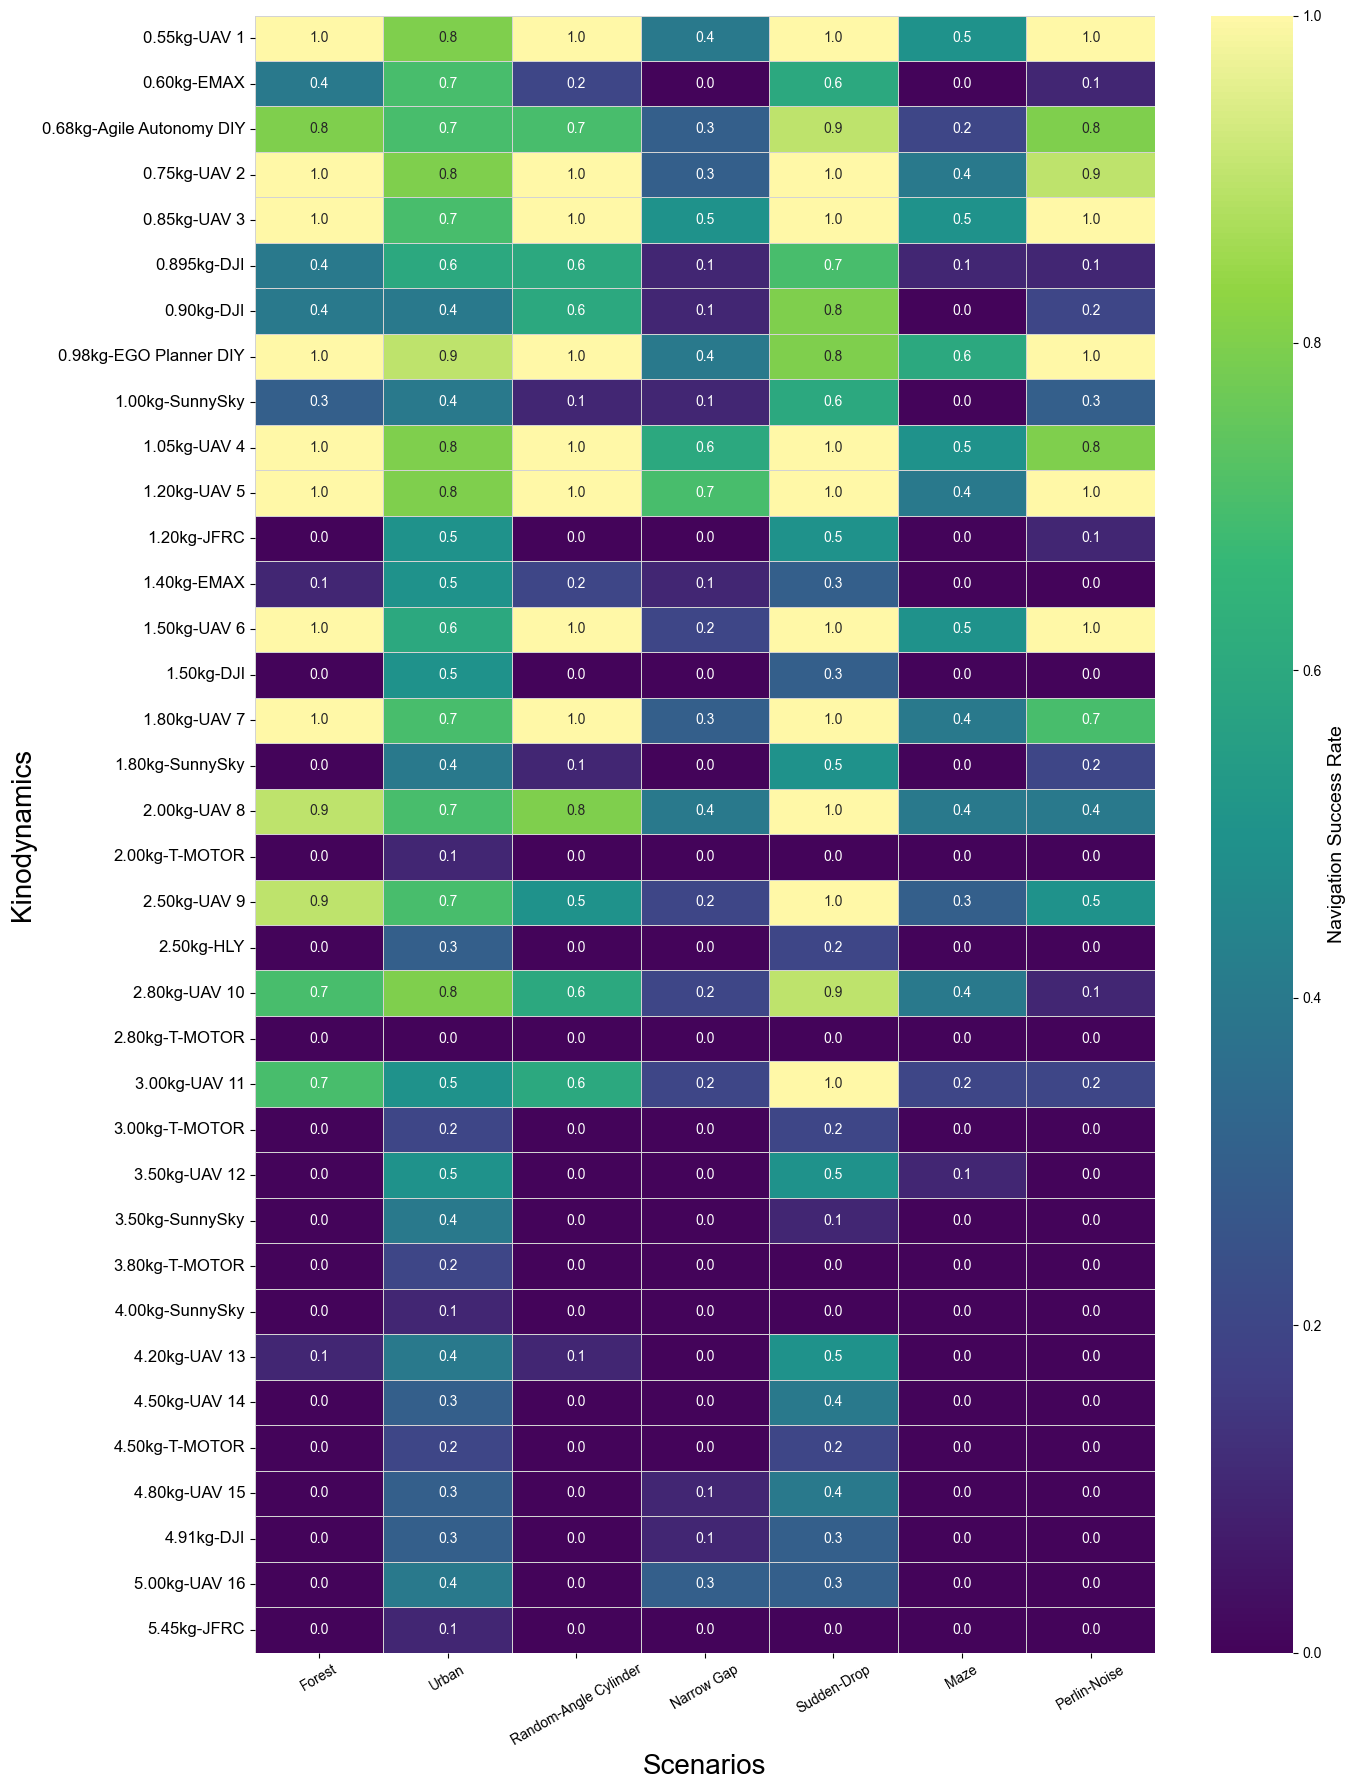

In [ ]:
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans Mono','Times New Roman', 'SimHei', 'Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

# Creating custom colour maps
# colors = ["#f0e68c", "#87cefa",  "#2a52be"]  
colors = ["#44045A", "#413E85","#30688D","#1F928B","#35B777","#91D542","#FFF8A7"]
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)
cmap.set_under('#CCCCCC')

def plot_first_heatmap():
    data1 = {
        '无人机型号': pre_treat_df['max_vel=4m/s'],
        'Forest': pre_treat_df['Forest'],
        'Urban': pre_treat_df['Urban'],
        'Random-Angle Cylinder': pre_treat_df['Random-Angle'],
        'Narrow Gap': pre_treat_df['Narrow'],
        'Sudden-Drop': pre_treat_df['Sudden‑Drop'],
        'Maze': pre_treat_df['Maze'],
        'Perlin-Noise': pre_treat_df['Perlin-Noise']
    }
    
    df1 = pd.DataFrame(data1)
    df1.set_index('无人机型号', inplace=True)
    
    df_values = df1.fillna(-1).copy()

    df_annot = df1.applymap(lambda x: "N/A" if pd.isna(x) else f"{x:.1f}")

    plt.figure(figsize=(14, 18))
    ax = sns.heatmap(
        df_values, 
        annot=df_annot, 
        fmt="",
        cmap=cmap,
        linewidths=0.5,
        linecolor='lightgray',
        vmin=0,
        vmax=1,
        cbar_kws={'label': 'navigation success rate'}
    )
    
    cbar = ax.collections[0].colorbar
    cbar.set_label('Navigation Success Rate', fontsize=14)
    
    # Setting up titles and labels
    plt.xlabel('Scenarios', fontsize=20)
    plt.ylabel('Kinodynamics', fontsize=20)
    
    # Adjusting font size
    ax.tick_params(axis='x', labelsize=10, rotation=30)
    ax.tick_params(axis='y', labelsize=12)
    
    # Rotate y-axis labels for better display
    plt.yticks(rotation=0)
    
    # Adding Grid Lines
    ax.hlines(np.arange(0, len(df1)+1), *ax.get_xlim(), colors='lightgray', linewidth=0.5)
    
    plt.tight_layout()
    plt.savefig(alo_name+'_Nav_success_rate.png', dpi=400)
    plt.savefig(alo_name+'_Nav_success_rate.pdf', dpi=600)
    plt.show()

plot_first_heatmap()